<a href="https://colab.research.google.com/github/olivarescr69/papers-repo/blob/main/Paper_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
#pip install scikit-plot
#!pip install kaggle
#!pip install kagglehub --upgrade
#!pip install imbalanced-learn
#!pip install jinja2

# TOPIC:
## Measures of Prediction Accuracy for Ethical AI: A Comparative Analysis on ICU Mortality Data
##### paper


#### Import Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from time import time
import matplotlib.patches as mpatches
#import scikitplot as skplt
from scipy.stats import skew

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve, auc, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import SMOTE

IMPORT DATA - WiDS Datathon 2020: ICU Mortality Prediction (Classification)

https://www.kaggle.com/competitions/widsdatathon2020/data

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load the dataset

In [89]:
# Load dataset
file_path = r"/content/drive/MyDrive/Colab Notebooks/training_v2.csv"
df_uci = pd.read_csv(file_path)

In [90]:
print("\nColumn Names:")
print(df_uci.columns)


Column Names:
Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)


#### Dataset Variables Description

| Variable         | Description                                      | Type    |
|-----------------|--------------------------------------------------|---------|
| `encounter_id`   | Unique identifier associated with a patient unit stay | Integer |
| `patient_id`     | Unique identifier associated with a patient     | Integer |
| `hospital_id`    | Unique identifier associated with a hospital    | Integer |
| `hospital_death` | Whether the patient died during hospitalization | Binary  |
| `age`            | Age of the patient on unit admission            | Float   |
| `bmi`            | Body Mass Index on unit admission               | Float   |
| `elective_surgery` | Whether admission was elective surgery        | Binary  |
| `ethnicity`      | Patient's ethnicity                              | String  |
| `gender`         | Patient's gender                                 | String  |
| `height`         | Height of patient (cm)                           | Float   |
| ...              | ...                                              | ...     |


In [91]:
df_uci.describe(include="all")

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90318,91688,90379.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90051,90051
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,10
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caucasian,M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70684,49469,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29999,38816
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,NaN,NaN,169.641588,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,NaN
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,NaN,NaN,10.795378,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,NaN
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,NaN,NaN,137.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,NaN,NaN,162.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,NaN,NaN,170.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,NaN,NaN,177.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [92]:
df_uci.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


### EXPLORATION AND CLEANING DATA

In [93]:
print("\nDataset Info:")
print(df_uci.info())
print("\nMissing Values:")
print(df_uci.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB
None

Missing Values:
encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64


In [94]:
summary_df = pd.DataFrame({
    "Column": df_uci.columns,
    "Unique Values": [df_uci[col].nunique() for col in df_uci.columns]
})

print(summary_df)

                          Column  Unique Values
0                   encounter_id          91713
1                     patient_id          91713
2                    hospital_id            147
3                 hospital_death              2
4                            age             74
..                           ...            ...
181                     leukemia              2
182                     lymphoma              2
183  solid_tumor_with_metastasis              2
184         apache_3j_bodysystem             11
185          apache_2_bodysystem             10

[186 rows x 2 columns]


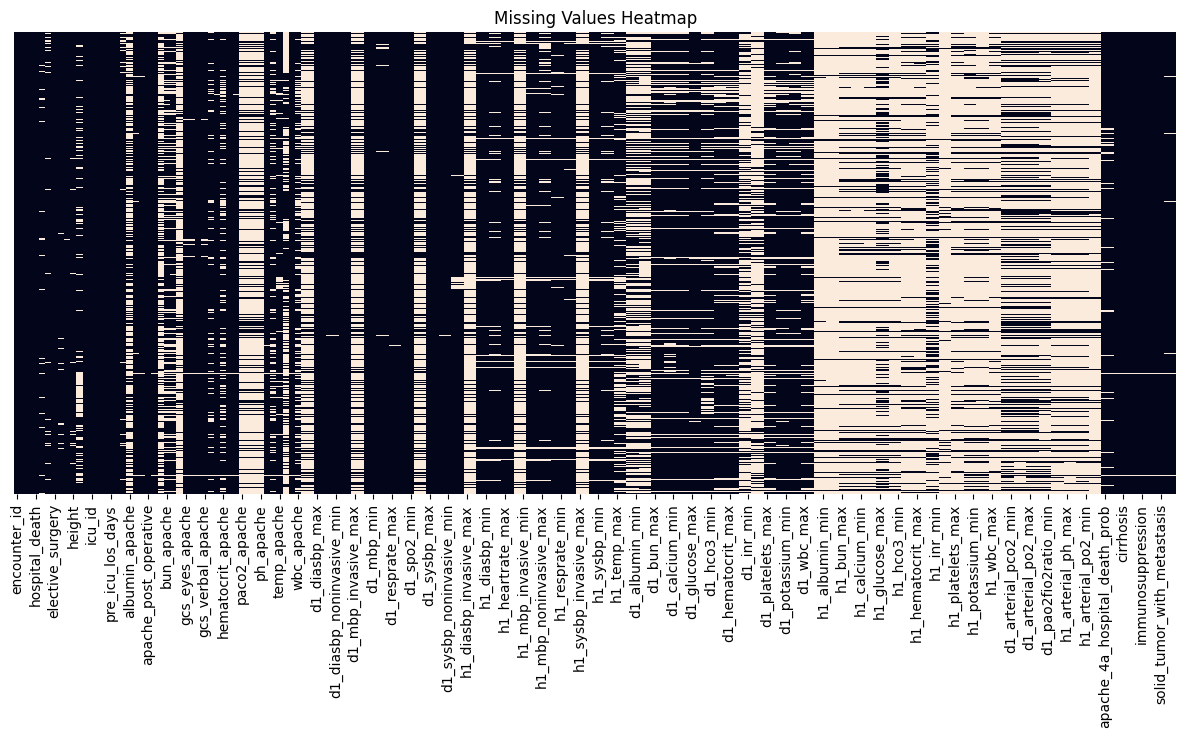

In [95]:
plt.figure(figsize=(15,6))
sns.heatmap(df_uci.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [96]:
# Missing values: calculate percentage per column
missing_percent = df_uci.isnull().sum() / len(df_uci) * 100
missing_percent = missing_percent.sort_values(ascending=False)
missing_percent.head(20)  # Muestra las 20 columnas con más NaN


,0
h1_bilirubin_min,92.265001
h1_bilirubin_max,92.265001
h1_lactate_min,91.992411
h1_lactate_max,91.992411
h1_albumin_max,91.398166
h1_albumin_min,91.398166
h1_pao2fio2ratio_min,87.441257
h1_pao2fio2ratio_max,87.441257
h1_arterial_ph_max,83.329517
h1_arterial_ph_min,83.329517


##### Rule of thumb:
##### >50% missing → consider dropping
##### 20-50% missing → consider imputing
##### <20% missing → usually safe to impute


Interpretation:

Columns like h1_bilirubin_min or h1_lactate_max have over 90% missing values.

These are not useful for analysis because most data is missing. Usually, you can drop them.

Columns with <20% missing could be imputed (replace missing values with mean, median, or other strategies).


In [97]:
# Low variability: check columns where one value dominates (>95%)
low_variability_cols = []
for col in df_uci.columns:
    top_freq = df_uci[col].value_counts(normalize=True, dropna=False).max()
    if top_freq > 0.95:
        low_variability_cols.append(col)

print("Columns with very low variability (>95% same value):")
print(low_variability_cols)

Columns with very low variability (>95% same value):
['readmission_status', 'arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


#### These columns hardly change across the dataset. For example, aids probably has mostly 0 (few patients have AIDS).
#### Columns with >95% of the same value do not contribute much to predictions.
#### Usually, we drop them from modeling.

In [98]:
# Correlation with target variable 'hospital_death'
num_cols = df_uci.select_dtypes(include=np.number).columns
correlation = df_uci[num_cols].corr()['hospital_death'].sort_values(ascending=False)
print("Top correlated numeric features with hospital_death:")
print(correlation.head(20))

Top correlated numeric features with hospital_death:
hospital_death                   1.000000
d1_lactate_min                   0.403614
d1_lactate_max                   0.399029
h1_lactate_min                   0.344046
h1_lactate_max                   0.340951
apache_4a_hospital_death_prob    0.311043
apache_4a_icu_death_prob         0.283913
ventilated_apache                0.228661
fio2_apache                      0.212249
h1_inr_max                       0.198641
d1_inr_max                       0.198641
d1_bun_max                       0.186558
bun_apache                       0.181435
d1_bun_min                       0.181383
h1_inr_min                       0.175804
d1_inr_min                       0.175804
intubated_apache                 0.173139
h1_bun_max                       0.167097
h1_bun_min                       0.166719
d1_heartrate_max                 0.162934
Name: hospital_death, dtype: float64


#### Features like lactate levels and APACHE death probability are highly correlated with hospital death, meaning they are important predictors.

Variables with correlation <0.1 are less predictive individually, but can still be useful in combination.

Numeric features highly correlated with your target are usually kept for modeling.

In [99]:
# Importance of categorical variables
cat_cols = df_uci.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nAverage hospital_death by category in {col}:")
    print(df_uci.groupby(col)['hospital_death'].mean().sort_values(ascending=False))



Average hospital_death by category in ethnicity:
ethnicity
Hispanic            0.099052
Native American     0.088832
Caucasian           0.087262
Asian               0.082374
Other/Unknown       0.080704
African American    0.078559
Name: hospital_death, dtype: float64

Average hospital_death by category in gender:
gender
F    0.088373
M    0.084417
Name: hospital_death, dtype: float64

Average hospital_death by category in hospital_admit_source:
hospital_admit_source
Step-Down Unit (SDU)    0.188329
Other ICU               0.150215
Other                   0.142857
Floor                   0.138796
Other Hospital          0.135283
Acute Care/Floor        0.105236
Direct Admit            0.102624
Emergency Department    0.087306
ICU                     0.085714
ICU to SDU              0.066667
Chest Pain Center       0.059701
Recovery Room           0.035912
Operating Room          0.035251
PACU                    0.029499
Observation             0.000000
Name: hospital_death, dtype: fl

##### Ethnicity:

Hispanic: 9.9% death

African American: 7.85% death

Shows small differences; ethnicity may be moderately informative.

Gender:

Female: 8.8% death

Male: 8.4% death

Small difference → not highly predictive.

Hospital / ICU source and type:

hospital_admit_source and icu_admit_source show big differences:

Step-Down Unit (SDU) → 18.8% death

PACU → 2.9% death

icu_type and apache_3j_bodysystem show meaningful differences.

Interpretation:

Categorical variables like admission source, ICU type, APACHE system are very important.

Variables with little variation in hospital death (e.g., gender, ethnicity) are less predictive but could still help.

#### Variables for the model

1. Numeric Variables (High correlation with hospital_death)

These features showed the highest correlation with the target variable and are likely to provide the most predictive power:

| Feature                         | Reason                                                 |
| ------------------------------- | ------------------------------------------------------ |
| `d1_lactate_min`                | Strong positive correlation (0.40) with hospital death |
| `d1_lactate_max`                | Strong correlation (0.39)                              |
| `h1_lactate_min`                | Moderate correlation (0.34)                            |
| `h1_lactate_max`                | Moderate correlation (0.34)                            |
| `apache_4a_hospital_death_prob` | APACHE predicted probability of hospital death         |
| `apache_4a_icu_death_prob`      | APACHE predicted probability in ICU                    |
| `ventilated_apache`             | Indicator of mechanical ventilation                    |
| `fio2_apache`                   | Oxygen support level                                   |
| `h1_inr_max`, `d1_inr_max`      | Blood coagulation measurements                         |
| `d1_bun_max`, `h1_bun_max`      | Kidney function indicators                             |
| `intubated_apache`              | Ventilation requirement                                |



#### 2. Categorical Variables (High importance based on target differences)

These categorical features showed significant differences in hospital death rates across categories:

| Feature                         | Reason                                                 |
| ------------------------------- | ------------------------------------------------------ |
| `d1_lactate_min`                | Strong positive correlation (0.40) with hospital death |
| `d1_lactate_max`                | Strong correlation (0.39)                              |
| `h1_lactate_min`                | Moderate correlation (0.34)                            |
| `h1_lactate_max`                | Moderate correlation (0.34)                            |
| `apache_4a_hospital_death_prob` | APACHE predicted probability of hospital death         |
| `apache_4a_icu_death_prob`      | APACHE predicted probability in ICU                    |
| `ventilated_apache`             | Indicator of mechanical ventilation                    |
| `fio2_apache`                   | Oxygen support level                                   |
| `h1_inr_max`, `d1_inr_max`      | Blood coagulation measurements                         |
| `d1_bun_max`, `h1_bun_max`      | Kidney function indicators                             |
| `intubated_apache`              | Ventilation requirement                                |


#### Variables to Ignore or Remove

Low-variance variables: Mostly zeros (aids, cirrhosis, hepatic_failure, etc.) provide little information.

High missing values (>90%): Features like h1_bilirubin_min/max, h1_lactate_min/max have too many missing entries.

Non-predictive identifiers: encounter_id, patient_id, hospital_id are unique IDs and do not help prediction.

### Variables for the model


In [100]:
# List of selected numeric features
numeric_features = [
    'd1_lactate_min', 'd1_lactate_max', 'h1_lactate_min', 'h1_lactate_max',
    'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
    'ventilated_apache', 'fio2_apache', 'h1_inr_max', 'd1_inr_max',
    'd1_bun_max', 'h1_bun_max', 'intubated_apache'
]

# List of selected categorical features
categorical_features = [
    'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type',
    'apache_3j_bodysystem', 'apache_2_bodysystem', 'gender', 'ethnicity'
]

# Combine all features
selected_features = numeric_features + categorical_features

# Target variable
target = 'hospital_death'

# Create a new DataFrame with selected features and target
df_model = df_uci[selected_features + [target]]

# Check the first few rows
df_model.head()


,d1_lactate_min,d1_lactate_max,h1_lactate_min,h1_lactate_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,ventilated_apache,fio2_apache,h1_inr_max,d1_inr_max,...,intubated_apache,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,gender,ethnicity,hospital_death
0,1.0,1.3,NaN,NaN,0.10,0.05,0.0,NaN,NaN,NaN,...,0.0,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular,M,Caucasian,0
1,3.5,3.5,3.5,3.5,0.47,0.29,1.0,1.0,1.3,1.3,...,0.0,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory,F,Caucasian,0
2,NaN,NaN,NaN,NaN,0.00,0.00,0.0,NaN,NaN,NaN,...,0.0,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic,F,Caucasian,0
3,NaN,NaN,NaN,NaN,0.04,0.03,1.0,0.6,1.6,1.6,...,1.0,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular,F,Caucasian,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,NaN,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma,M,Caucasian,0


In [101]:
print("\nMissing Values per Column:")
print(df_model.isnull().sum())


Missing Values per Column:
d1_lactate_min                   68396
d1_lactate_max                   68396
h1_lactate_min                   84369
h1_lactate_max                   84369
apache_4a_hospital_death_prob     7947
apache_4a_icu_death_prob          7947
ventilated_apache                  715
fio2_apache                      70868
h1_inr_max                       57941
d1_inr_max                       57941
d1_bun_max                       10514
h1_bun_max                       75091
intubated_apache                   715
hospital_admit_source            21409
icu_admit_source                   112
icu_stay_type                        0
icu_type                             0
apache_3j_bodysystem              1662
apache_2_bodysystem               1662
gender                              25
ethnicity                         1395
hospital_death                       0
dtype: int64


#### Transform Traget Variables

In [102]:
#Check with value counts to see the distribution:

df_uci['hospital_death'].value_counts()

,count
hospital_death,
0,83798
1,7915


#### This is the raw count of each class:

0 (survived) → 83,798 patients

1 (died) → 7,915 patients

In [103]:
# Calculate percentages of each class
target_percentages = df_uci['hospital_death'].value_counts(normalize=True) * 100

# Print the result
print(target_percentages)


hospital_death
0    91.369817
1     8.630183
Name: proportion, dtype: float64


#### About 91.37% of patients survived (0)

About 8.63% of patients died (1)

This shows your dataset is highly imbalanced toward survival.

#### Transform Numeric Variables

In [104]:
# Select only numeric columns
numeric_cols = df_uci.select_dtypes(include=['float64', 'int64']).columns

# Display basic statistics for numeric variables
df_uci[numeric_cols].describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
# Missing Value Imputation
num_cols = numeric_features
cat_cols = categorical_features

# Impute numerical columns with the median
num_imputer = SimpleImputer(strategy='median')
df_model[num_cols] = num_imputer.fit_transform(df_model[num_cols])

# Impute categorical columns with the most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_model[cat_cols] = cat_imputer.fit_transform(df_model[cat_cols])

/tmp/ipython-input-3853734882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[num_cols] = num_imputer.fit_transform(df_model[num_cols])
/tmp/ipython-input-3853734882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[cat_cols] = cat_imputer.fit_transform(df_model[cat_cols])


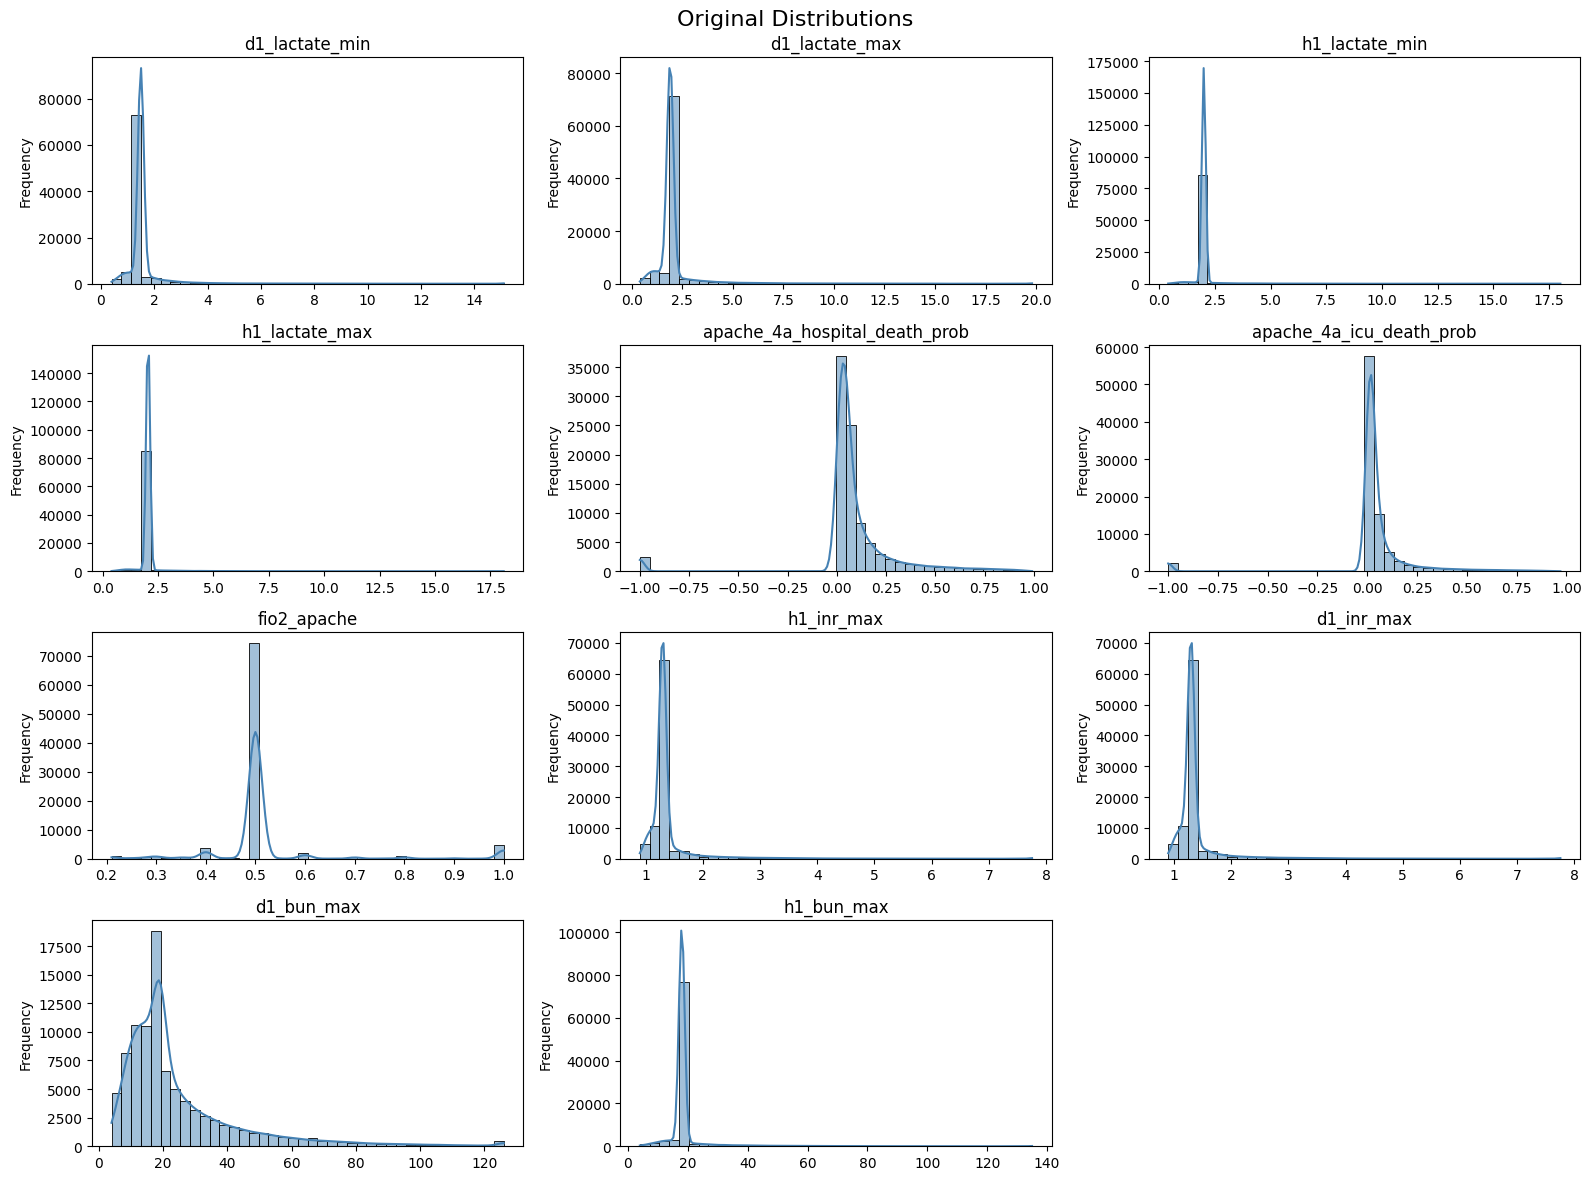

Skewness of original variables:
d1_lactate_min: 7.63
d1_lactate_max: 6.44
h1_lactate_min: 10.54
h1_lactate_max: 10.43
apache_4a_hospital_death_prob: -1.51
apache_4a_icu_death_prob: -2.09
fio2_apache: 2.43
h1_inr_max: 6.33
d1_inr_max: 6.33
d1_bun_max: 2.34
h1_bun_max: 6.58


In [106]:
# Original distributions
numerical_cols = [
    'd1_lactate_min', 'd1_lactate_max', 'h1_lactate_min', 'h1_lactate_max',
    'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
    'fio2_apache', 'h1_inr_max', 'd1_inr_max', 'd1_bun_max', 'h1_bun_max'
]

# Visualize original data
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
fig.suptitle('Original Distributions', fontsize=16)

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    sns.histplot(df_model[col], bins=40, kde=True, ax=axes[row, col_idx], color='steelblue')
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_xlabel("")
    axes[row, col_idx].set_ylabel("Frequency")

# Remove the extra subplot if less than 12 variables
if len(numerical_cols) < 12:
    fig.delaxes(axes[3, 2])

plt.tight_layout()
plt.show()

print("Skewness of original variables:")
for col in numerical_cols:
    print(f"{col}: {skew(df_model[col]):.2f}")


### 📈 Skewness (Asymmetry of the Distribution)

- **|Skewness| < 0.5**: Approximately symmetric distribution.  
- **|Skewness| between 0.5 and 1**: Moderately skewed distribution.  
- **|Skewness| > 1**: Highly skewed distribution, may benefit from transformation.  

**Interpretation of the sign:**  
- **Positive skewness** ➝ skewed to the **right** (long tail to the right).  
- **Negative skewness** ➝ skewed to the **left** (long tail to the left).

In [107]:
# Hybrid transformation (for Logistic Regression)
df_transformed = df_model.copy()

# Variables for log1p
log_vars = ['d1_lactate_min', 'd1_lactate_max', 'd1_bun_max', 'h1_bun_max']
# Variables for Yeo-Johnson
yeo_vars = ['h1_lactate_min', 'h1_lactate_max', 'h1_inr_max', 'd1_inr_max']

# AApply log1p
for col in log_vars:
    df_transformed[col] = np.log1p(df_transformed[col])

# Apply Yeo-Johnson
df_transformed[yeo_vars] = power_transform(df_transformed[yeo_vars], method='yeo-johnson')

In [108]:
# Standardization for Logistic Regression
scaler = StandardScaler()
X_logreg = scaler.fit_transform(df_transformed[numerical_cols])

# For Random Forest: can use df_transformed[numerical_cols] directly
X_rf = df_transformed[numerical_cols].copy()

##### Transform Distributions to Reduce Skewness

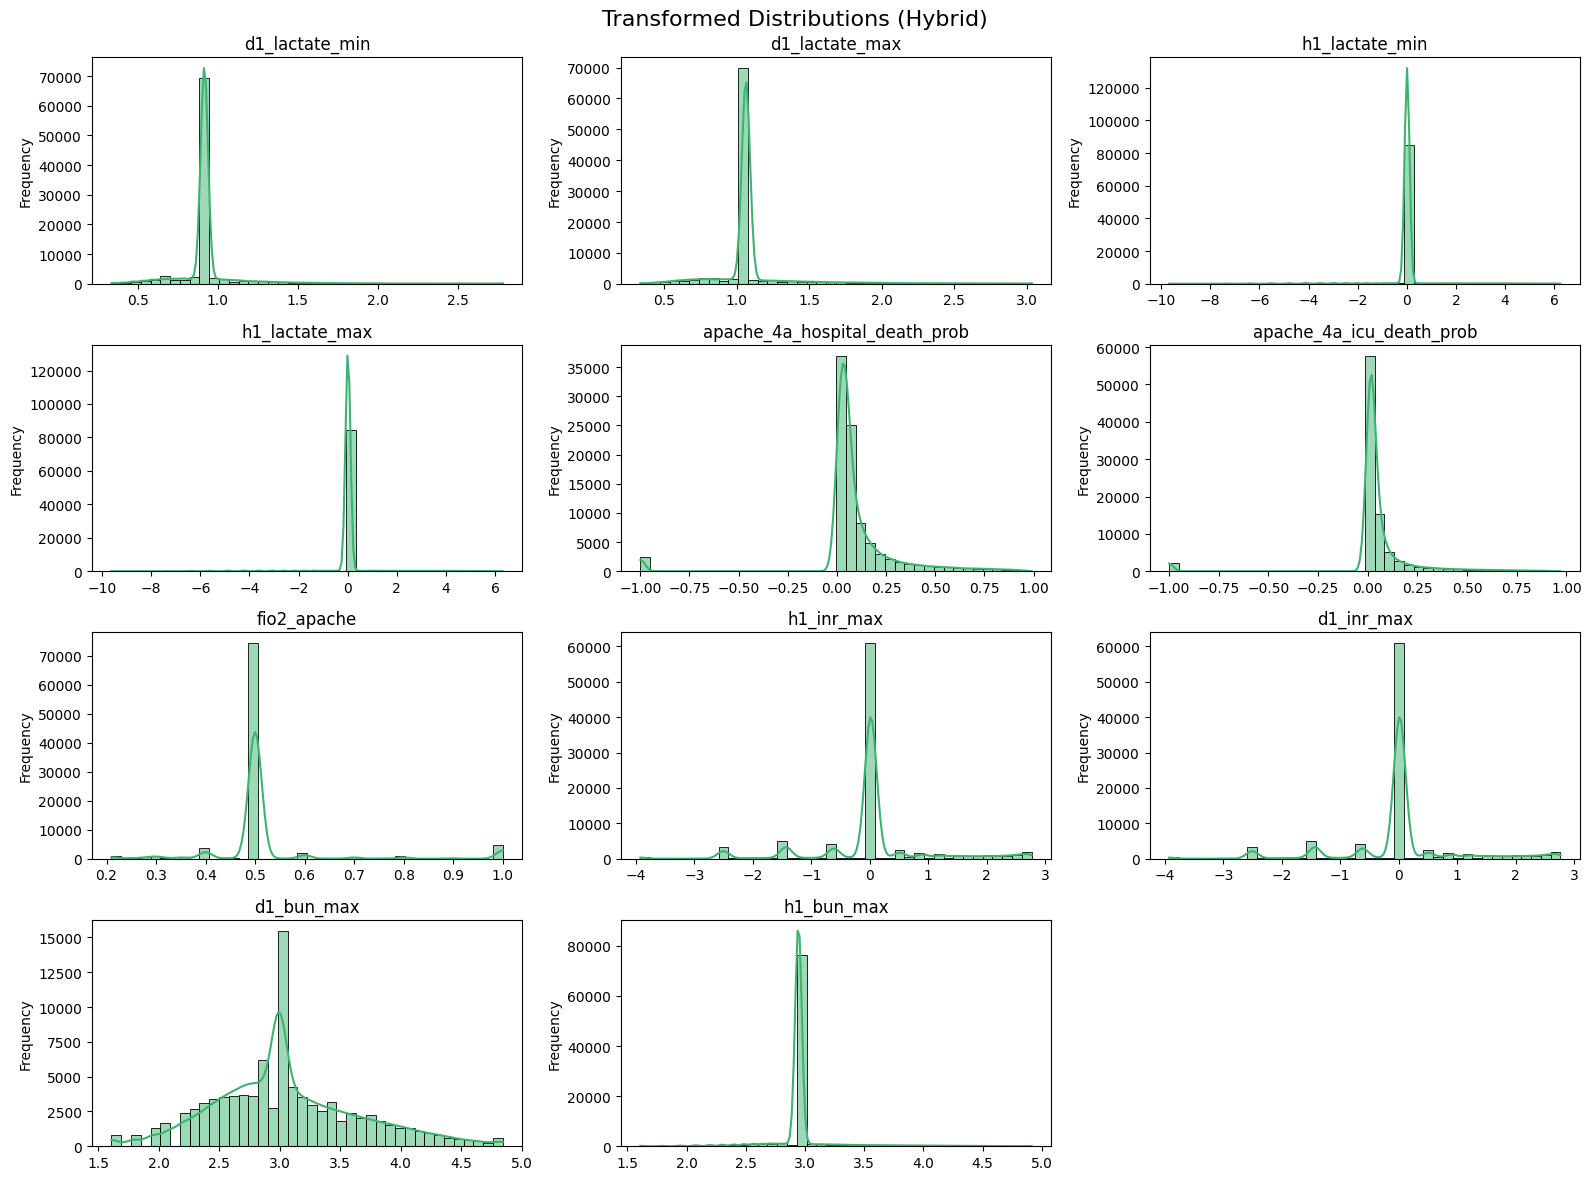

Skewness after hybrid transformation:
d1_lactate_min: 3.69
d1_lactate_max: 3.05
h1_lactate_min: -1.25
h1_lactate_max: -1.22
apache_4a_hospital_death_prob: -1.51
apache_4a_icu_death_prob: -2.09
fio2_apache: 2.43
h1_inr_max: -0.17
d1_inr_max: -0.17
d1_bun_max: 0.43
h1_bun_max: 2.16


In [109]:
# Visualize standardized distributions
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
fig.suptitle('Transformed Distributions (Hybrid)', fontsize=16)

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    sns.histplot(df_transformed[col], bins=40, kde=True, ax=axes[row, col_idx], color='mediumseagreen')
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_xlabel("")
    axes[row, col_idx].set_ylabel("Frequency")

# Remove extra subplot
if len(numerical_cols) < 12:
    fig.delaxes(axes[3, 2])

plt.tight_layout()
plt.show()

print("Skewness after hybrid transformation:")
for col in numerical_cols:
    print(f"{col}: {skew(df_transformed[col]):.2f}")

| Variable                      | Original Skew | Transformation Applied | Skewness After Transformation |
| ----------------------------- | ------------- | ---------------------- | ----------------------------- |
| d1_lactate_min                | 7.63          | log1p                  | 3.69                          |
| d1_lactate_max                | 6.44          | log1p                  | 3.05                          |
| h1_lactate_min                | 10.54         | Yeo–Johnson            | -1.25                         |
| h1_lactate_max                | 10.43         | Yeo–Johnson            | -1.22                         |
| apache_4a_hospital_death_prob | -1.51         | None                   | -1.51                         |
| apache_4a_icu_death_prob      | -2.09         | None                   | -2.09                         |
| fio2_apache                   | 2.43          | None                   | 2.43                          |
| h1_inr_max                    | 6.33          | Yeo–Johnson            | -0.17                         |
| d1_inr_max                    | 6.33          | Yeo–Johnson            | -0.17                         |
| d1_bun_max                    | 2.34          | log1p                  | 0.43                          |
| h1_bun_max                    | 6.58          | log1p                  | 2.16                          |


#### One Hot Encoding

In [113]:
# One-Hot Encoding for categorical variables
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_cat_ohe = ohe.fit_transform(df_model[cat_cols])

# Get feature names for the encoded columns
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

# Convert to DataFrame
X_cat_ohe_df = pd.DataFrame(X_cat_ohe, columns=ohe_feature_names, index=df_model.index)

# Combine with numerical features
# Logistic Regression: scaled + transformed numerical
X_logreg_full = pd.concat([pd.DataFrame(X_logreg, columns=numerical_cols, index=df_model.index),
                            X_cat_ohe_df], axis=1)

# Random Forest: transformed numerical
X_rf_full = pd.concat([X_rf, X_cat_ohe_df], axis=1)

# Ready to use
print("Shape of Logistic Regression dataset:", X_logreg_full.shape)
print("Shape of Random Forest dataset:", X_rf_full.shape)


Shape of Logistic Regression dataset: (91713, 63)
Shape of Random Forest dataset: (91713, 63)


#### Target and Features

In [115]:
# Prepare features and target
# Target variable
y = df_model['hospital_death']  # Replace 'target_column' with your actual target column name

# Features (X)
# Logistic Regression: scaled + transformed numerical + one-hot categorical
X_logreg = X_logreg_full.copy()

# Random Forest: transformed numerical + one-hot categorical (no scaling needed)
X_rf = X_rf_full.copy()

print("X_logreg shape:", X_logreg.shape)
print("X_rf shape:", X_rf.shape)
print("y shape:", y.shape)


X_logreg shape: (91713, 63)
X_rf shape: (91713, 63)
y shape: (91713,)


#### Split Data

In [117]:
# Split into train and test sets
# Stratify by target to maintain class balance
X_logreg_train, X_logreg_test, y_train, y_test = train_test_split(
    X_logreg, y, test_size=0.2, random_state=42, stratify=y
)

X_rf_train, X_rf_test, _, _ = train_test_split(
    X_rf, y, test_size=0.2, random_state=42, stratify=y
)

print("Train/Test split done.")
print("X_logreg_train shape:", X_logreg_train.shape)
print("X_logreg_test shape:", X_logreg_test.shape)

Train/Test split done.
X_logreg_train shape: (73370, 63)
X_logreg_test shape: (18343, 63)


#### SMOTE (Synthetic Minority Oversampling Technique)

In [118]:
# Apply SMOTE on training set only (for Logistic Regression example)
smote = SMOTE(random_state=42)
X_logreg_train_res, y_train_res = smote.fit_resample(X_logreg_train, y_train)

print("\nClass Distribution After SMOTE (training set):")
print(pd.Series(y_train_res).value_counts(normalize=True))

# For Random Forest: optional, as RF handles imbalance better
X_rf_train_res, y_train_res_rf = smote.fit_resample(X_rf_train, y_train)

print("\nClass Distribution After SMOTE (training set for RF):")
print(pd.Series(y_train_res_rf).value_counts(normalize=True))


Class Distribution After SMOTE (training set):
hospital_death
1    0.5
0    0.5
Name: proportion, dtype: float64

Class Distribution After SMOTE (training set for RF):
hospital_death
1    0.5
0    0.5
Name: proportion, dtype: float64


#### Model 1

In [119]:
# Train Random Forest Model (on SMOTE-resampled training set)
rf_model = RandomForestClassifier(random_state=24, n_estimators=100)
rf_model.fit(X_rf_train_res, y_train_res_rf)  # Use resampled train set

# Predictions on original test set
y_pred_rf = rf_model.predict(X_rf_test)
y_prob_rf = rf_model.predict_proba(X_rf_test)[:, 1]


#### Classification Meterics Model 1
Confusion Matrix

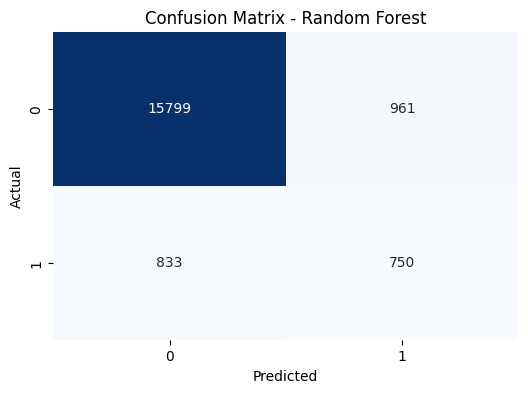

In [120]:
# Plot Confusion Matrix
cm_rf = confusion_matrix(y_rf_test := y_test, y_pred_rf)  # y_test is untouched
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [121]:
# Calculate Metrics
tn, fp, fn, tp = cm_rf.ravel()

rf_metrics = {
    'Accuracy Score': accuracy_score(y_rf_test, y_pred_rf),
    'Error / Misclassification Rate': 1 - accuracy_score(y_rf_test, y_pred_rf),
    'Sensitivity / Recall / TPR': recall_score(y_rf_test, y_pred_rf),
    'False Positive Rate': fp / (fp + tn),
    'True Negative Rate / Specificity': tn / (tn + fp),
    'Precision': precision_score(y_rf_test, y_pred_rf),
    'F1 Score': f1_score(y_rf_test, y_pred_rf),
    'Log Loss': log_loss(y_rf_test, y_prob_rf),
    'ROC AUC': roc_auc_score(y_rf_test, y_prob_rf)
}

print("\nRandom Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.3f}")



Random Forest Metrics:
Accuracy Score: 0.902
Error / Misclassification Rate: 0.098
Sensitivity / Recall / TPR: 0.474
False Positive Rate: 0.057
True Negative Rate / Specificity: 0.943
Precision: 0.438
F1 Score: 0.455
Log Loss: 0.311
ROC AUC: 0.856


#### Model 2

In [122]:
# Train Logistic Regression (on SMOTE-resampled training set)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_logreg_train_res, y_train_res)  # X_logreg_train_res from SMOTE

# Predictions on original test set
y_pred_lr = lr_model.predict(X_logreg_test)
y_prob_lr = lr_model.predict_proba(X_logreg_test)[:, 1]

#### Classification Meterics Model 2
Confusion Matrix

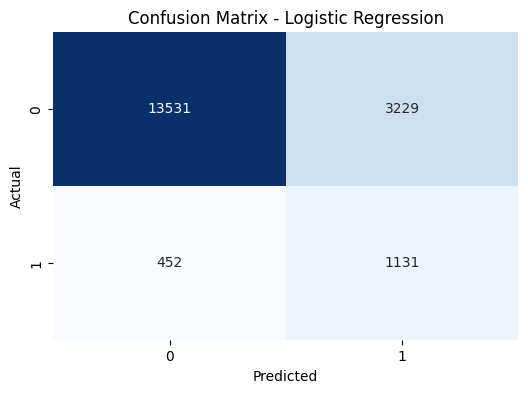

In [123]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_logreg_test := y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [124]:
# Metrics for Logistic Regression
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()

lr_metrics = {
    'Accuracy Score': accuracy_score(y_logreg_test, y_pred_lr),
    'Error / Misclassification Rate': 1 - accuracy_score(y_logreg_test, y_pred_lr),
    'Sensitivity / Recall / TPR': recall_score(y_logreg_test, y_pred_lr),
    'False Positive Rate': fp_lr / (fp_lr + tn_lr),
    'True Negative Rate / Specificity': tn_lr / (tn_lr + fp_lr),
    'Precision': precision_score(y_logreg_test, y_pred_lr),
    'F1 Score': f1_score(y_logreg_test, y_pred_lr),
    'Log Loss': log_loss(y_logreg_test, y_prob_lr),
    'ROC AUC': roc_auc_score(y_logreg_test, y_prob_lr)
}

print("\nLogistic Regression Metrics:")
for metric, value in lr_metrics.items():
    print(f"{metric}: {value:.3f}")



Logistic Regression Metrics:
Accuracy Score: 0.799
Error / Misclassification Rate: 0.201
Sensitivity / Recall / TPR: 0.714
False Positive Rate: 0.193
True Negative Rate / Specificity: 0.807
Precision: 0.259
F1 Score: 0.381
Log Loss: 0.482
ROC AUC: 0.837


# Compare Models

In [126]:
# Compare Models
print("\nModel Comparison:")
metrics_df = pd.DataFrame({'Metric': lr_metrics.keys(), 'Logistic Regression': lr_metrics.values(), 'Random Forest': rf_metrics.values()})

metrics_df = metrics_df.round(4)
display(metrics_df)


Model Comparison:


,Metric,Logistic Regression,Random Forest
0,Accuracy Score,0.7993,0.9022
1,Error / Misclassification Rate,0.2007,0.0978
2,Sensitivity / Recall / TPR,0.7145,0.4738
3,False Positive Rate,0.1927,0.0573
4,True Negative Rate / Specificity,0.8073,0.9427
5,Precision,0.2594,0.4383
6,F1 Score,0.3806,0.4554
7,Log Loss,0.4824,0.3115
8,ROC AUC,0.8373,0.8563


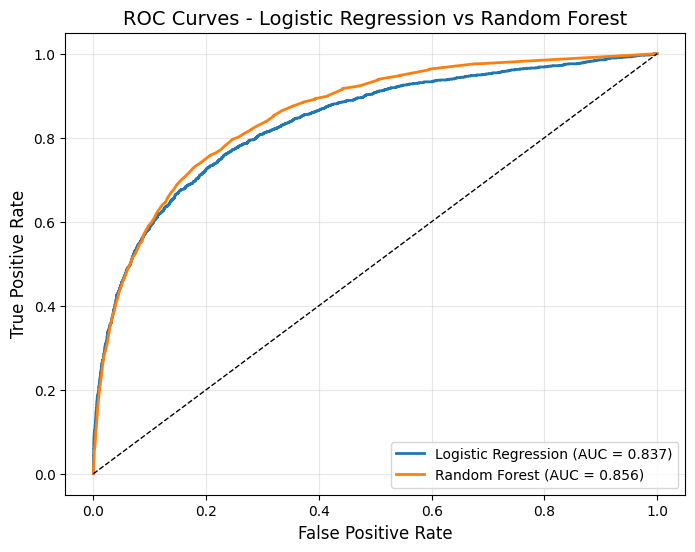

In [127]:
# Plot ROC Curves for Both Models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_metrics["ROC AUC"]:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_metrics["ROC AUC"]:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Logistic Regression vs Random Forest', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# PERFORMANCE CLASSIFICATION MODEL

In [133]:
# Function to Train and Evaluate a Classification Model
def predict_classification_model(model, sample_size, X_train, y_train, X_test, y_test):
    results = {}
    if not 0 < sample_size <= 1:
        raise ValueError("sample_size must be between 0 and 1")
    # Training
    start = time()
    n_samples = int(X_train.shape[0] * sample_size)
    model.fit(X_train[:n_samples], y_train[:n_samples])
    end = time()
    results['train_time'] = end - start
    # Predictions
    start = time()
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train[:300])
    test_prob = model.predict_proba(X_test)[:, 1]
    train_prob = model.predict_proba(X_train[:300])[:, 1]
    end = time()
    results['pred_time'] = end - start
    # Metrics
    results['Accuracy_test'] = accuracy_score(y_test, test_pred)
    results['F1_test'] = f1_score(y_test, test_pred)
    results['ROC_AUC_test'] = roc_auc_score(y_test, test_prob)
    results['Accuracy_train'] = accuracy_score(y_train[:300], train_pred)
    results['F1_train'] = f1_score(y_train[:300], train_pred)
    results['ROC_AUC_train'] = roc_auc_score(y_train[:300], train_prob)
    return results

In [134]:
# Define Sample Sizes and Run Evaluations
sample_sizes = [0.2, 0.6, 1.0]
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

In [135]:
# RUN Evaluations
results = {model_name: [] for model_name in models}
for size in sample_sizes:
    for name, model in models.items():
        if name == 'Logistic Regression':
            res = predict_classification_model(model, size, X_logreg_train_res, y_train_res, X_logreg_test, y_test)
        else:
            res = predict_classification_model(model, size, X_rf_train_res, y_train_res_rf, X_rf_test, y_test)
        results[name].append(res)

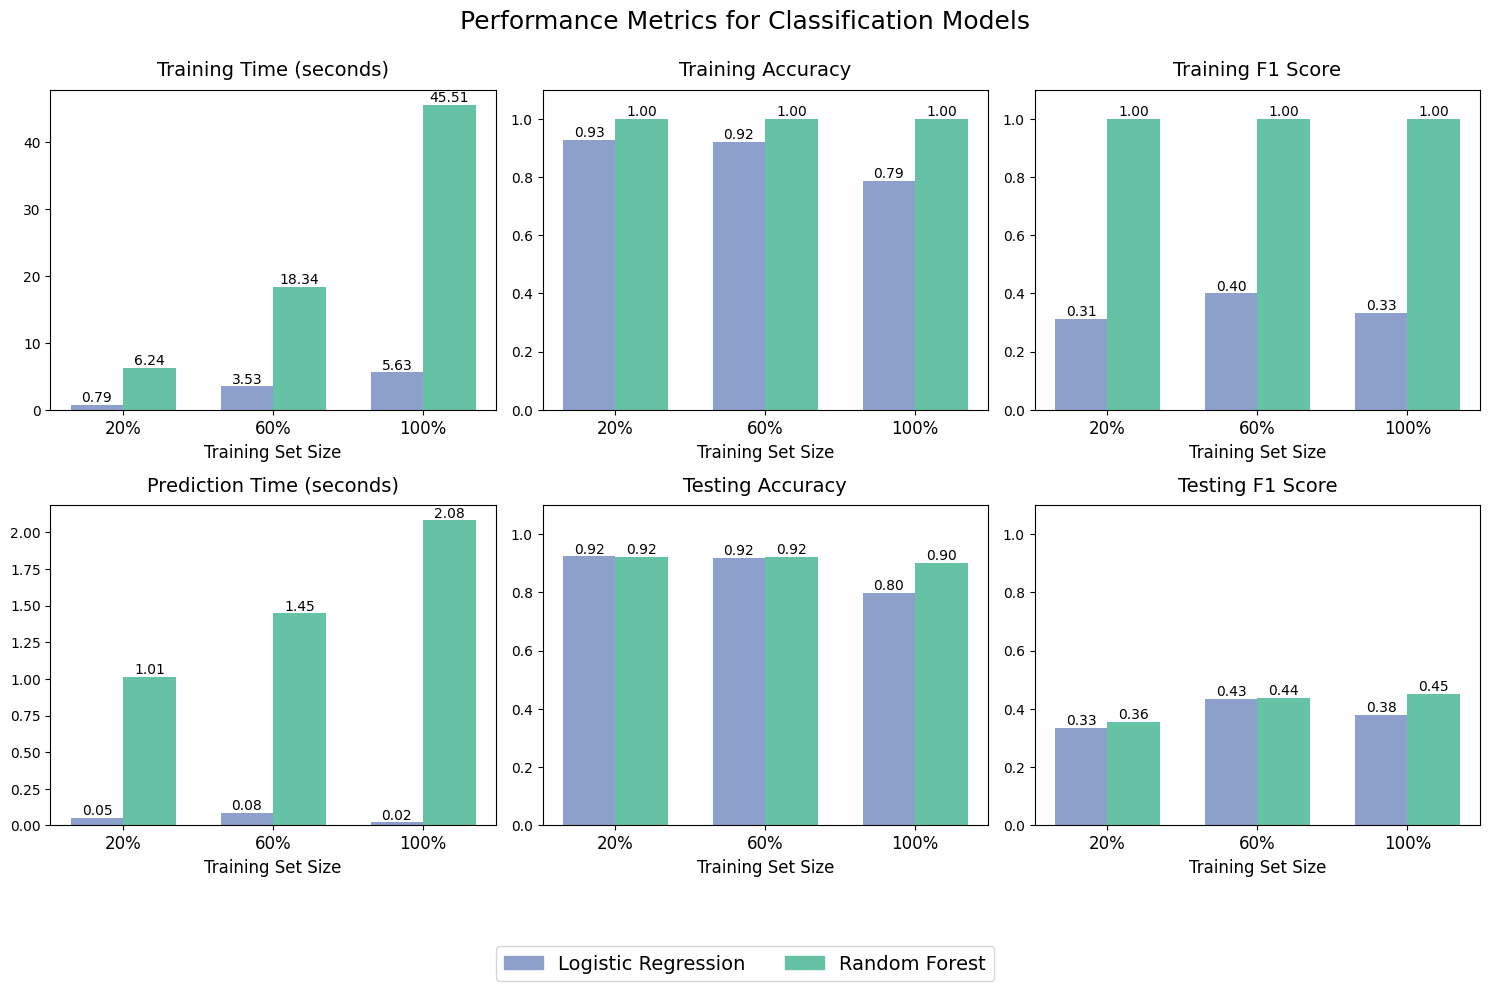

In [137]:
# Plot Results
def plot_results(results, sample_labels):
    fig, ax = plt.subplots(2, 3, figsize=(15, 9))
    bar_width = 0.35
    colors = ['#8da0cb', '#66c2a5']
    metrics = ['train_time', 'Accuracy_train', 'F1_train', 'pred_time', 'Accuracy_test', 'F1_test']
    titles = ['Training Time (seconds)', 'Training Accuracy', 'Training F1 Score',
              'Prediction Time (seconds)', 'Testing Accuracy', 'Testing F1 Score']
    for i, metric in enumerate(metrics):
        for j, model_name in enumerate(results):
            values = [res[metric] for res in results[model_name]]
            x_positions = np.arange(len(sample_labels)) + j * bar_width
            bars = ax[i//3, i%3].bar(x_positions, values, width=bar_width, color=colors[j],
                                     label=model_name if i == 0 else "")
            for bar in bars:
                height = bar.get_height()
                ax[i//3, i%3].text(bar.get_x() + bar.get_width()/2., height,
                                   f'{height:.2f}' if height > 0 else '0.00',
                                   ha='center', va='bottom', fontsize=10)
        ax[i//3, i%3].set_xticks(np.arange(len(sample_labels)) + bar_width / 2)
        ax[i//3, i%3].set_xticklabels(sample_labels, fontsize=12)
        ax[i//3, i%3].set_title(titles[i], fontsize=14, pad=10)
        ax[i//3, i%3].set_xlabel("Training Set Size", fontsize=12)
        if metric in ['Accuracy_train', 'Accuracy_test', 'F1_train', 'F1_test']:
            ax[i//3, i%3].set_ylim(0, 1.1)
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    fig.suptitle("Performance Metrics for Classification Models", fontsize=18, y=0.98)
    legend_patches = [mpatches.Patch(color=colors[i], label=list(results.keys())[i]) for i in range(len(results))]
    fig.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=14, frameon=True)
    plt.show()

plot_results(results, [f"{int(size*100)}%" for size in sample_sizes])

In [138]:
# Display Results Table without Styling
def display_results_table(results, sample_labels):
    data = []
    for model_name in results:
        model_results = []
        for size_results in results[model_name]:
            row = [
                size_results['train_time'],
                size_results['Accuracy_train'],
                size_results['F1_train'],
                size_results['pred_time'],
                size_results['Accuracy_test'],
                size_results['F1_test']
            ]
            model_results.append(row)
        data.append(model_results)
    columns = ['Training Time (s)', 'Training Accuracy', 'Training F1', 'Prediction Time (s)', 'Testing Accuracy', 'Testing F1']
    table = pd.DataFrame(
        np.array(data).reshape(len(results)*len(sample_labels), len(columns)),
        index=pd.MultiIndex.from_product([list(results.keys()), sample_labels], names=["Model", "Sample Size"]),
        columns=columns
    )
    table = table.round(4)
    display(table)

display_results_table(results, [f"{int(size*100)}%" for size in sample_sizes])



Training Time (s)  Training Accuracy  \
Model               Sample Size                                         
Logistic Regression 20%                     0.7871             0.9267   
                    60%                     3.5281             0.9200   
                    100%                    5.6273             0.7867   
Random Forest       20%                     6.2415             1.0000   
                    60%                    18.3386             1.0000   
                    100%                   45.5126             1.0000   

                                 Training F1  Prediction Time (s)  \
Model               Sample Size                                     
Logistic Regression 20%               0.3125               0.0509   
                    60%               0.4000               0.0839   
                    100%              0.3333               0.0207   
Random Forest       20%               1.0000               1.0135   
                    60%               1.0000               1.4479   
                    100%              1.0000               2.0824   

                                 Testing Accuracy  Testing F1  
Model               Sample Size                                
Logistic Regression 20%                    0.9240      0.3343  
                    60%                    0.9195      0.4339  
                    100%                   0.7993      0.3806  
Random Forest       20%                    0.9233      0.3568  
                    60%                    0.9225      0.4371  
                    100%                   0.9012      0.4528